In [ ]:
# given a set of x's and y's from a polynomial
# can we train a NN to model the function?
# what kinds of models work well?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

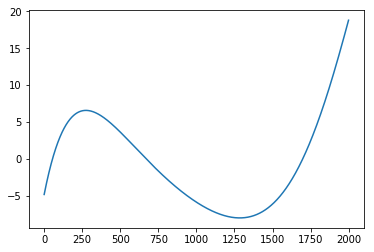

In [327]:
def rand_poly(N=7):
    xs = np.arange(-1.0, 1.0, 0.001)
    coeffs = np.array([np.random.uniform(-1.0, 1.0)*20 for _ in range(N)])
    ys = np.polynomial.polynomial.polyval(xs, coeffs)
    return xs, ys
    ys[:5]
    
xs, ys = rand_poly()
plt.plot(ys)

In [203]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
import random

(1616,)


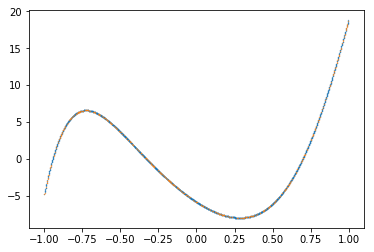

In [339]:
def train_test_split(xs, ys):
#     xs_chunks = np.array(np.split(xs, 40))
#     ys_chunks = np.array(np.split(ys, 40))
#     L = xx.shape[0]
    xs_chunks = xs
    ys_chunks = ys
    L = len(xs)
    sides = [int(random.random() < 0.2) for _ in range(L)]
    x_train, x_test = [], []
    y_train, y_test = [], []
#     print(sides)
    for index, side in enumerate(sides):
        if side == 0:
            x_train.append(xs_chunks[index])
            y_train.append(ys_chunks[index])
        else:
            x_test.append(xs_chunks[index])
            y_test.append(ys_chunks[index])
#     print([np.array(a).shape for a in [x_train, y_train, x_test, y_test]])
#     print(np.array(x_train).shape)
#     return [np.concatenate(a) for a in [x_train, y_train, x_test, y_test]]
    return [np.array(a) for a in [x_train, y_train, x_test, y_test]]

x_train, y_train, x_test, y_test = train_test_split(xs, ys)

plt.scatter(x_train, y_train, s=0.1)
plt.scatter(x_test, y_test, s=0.1)
print(x_train.shape)

In [317]:
i, j = 50, 0
xs[i], x_train[j], x_test[j], ys[i], y_train[j], y_test[j]

(50, 1, 0, -50, -1, 0)

In [343]:
model = Sequential()
model.add(Dense(10, input_dim=1))
model.add(Dense(10, activation='sigmoid'))
# model.add(LeakyReLU(alpha=0.03))
model.add(Dense(10, activation='sigmoid'))
# model.add(LeakyReLU(alpha=0.03))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='rmsprop', metrics=['mae', 'accuracy'])

history = model.fit(x_train, y_train, 
                   validation_data=(x_test, y_test), 
                    batch_size=32,
                    epochs=200, 
                    verbose=1,
                    shuffle=True)

# model.summary()


Train on 1616 samples, validate on 384 samples
Epoch 1/200
1616/1616 [==============================] - 1s 862us/sample - loss: 38.6544 - mean_absolute_error: 5.2597 - acc: 0.0000e+00 - val_loss: 44.2427 - val_mean_absolute_error: 5.4160 - val_acc: 0.0000e+00
Epoch 2/200
1616/1616 [==============================] - 0s 103us/sample - loss: 38.5149 - mean_absolute_error: 5.2605 - acc: 0.0000e+00 - val_loss: 43.9552 - val_mean_absolute_error: 5.4144 - val_acc: 0.0000e+00
Epoch 3/200
1616/1616 [==============================] - 0s 93us/sample - loss: 38.4696 - mean_absolute_error: 5.2657 - acc: 0.0000e+00 - val_loss: 43.8406 - val_mean_absolute_error: 5.4137 - val_acc: 0.0000e+00
Epoch 4/200
1616/1616 [==============================] - 0s 100us/sample - loss: 38.4509 - mean_absolute_error: 5.2676 - acc: 0.0000e+00 - val_loss: 43.7645 - val_mean_absolute_error: 5.4132 - val_acc: 0.0000e+00
Epoch 5/200
1616/1616 [==============================] - 0s 85us/sample - loss: 38.4405 - mean_absolut

1616/1616 [==============================] - 0s 84us/sample - loss: 6.8650 - mean_absolute_error: 1.1939 - acc: 0.0000e+00 - val_loss: 11.1846 - val_mean_absolute_error: 1.6136 - val_acc: 0.0000e+00
Epoch 78/200
1616/1616 [==============================] - 0s 76us/sample - loss: 6.8275 - mean_absolute_error: 1.1840 - acc: 0.0000e+00 - val_loss: 11.1166 - val_mean_absolute_error: 1.6032 - val_acc: 0.0000e+00
Epoch 79/200
1616/1616 [==============================] - 0s 75us/sample - loss: 6.7836 - mean_absolute_error: 1.1695 - acc: 0.0000e+00 - val_loss: 11.0736 - val_mean_absolute_error: 1.6073 - val_acc: 0.0000e+00
Epoch 80/200
1616/1616 [==============================] - 0s 86us/sample - loss: 6.7464 - mean_absolute_error: 1.1632 - acc: 0.0000e+00 - val_loss: 10.9877 - val_mean_absolute_error: 1.5784 - val_acc: 0.0000e+00
Epoch 81/200
1616/1616 [==============================] - 0s 82us/sample - loss: 6.6858 - mean_absolute_error: 1.1478 - acc: 0.0000e+00 - val_loss: 10.8952 - val_mea

Epoch 116/200
1616/1616 [==============================] - 0s 84us/sample - loss: 1.6228 - mean_absolute_error: 0.5331 - acc: 0.0000e+00 - val_loss: 2.8750 - val_mean_absolute_error: 0.7525 - val_acc: 0.0000e+00
Epoch 117/200
1616/1616 [==============================] - 0s 79us/sample - loss: 1.5719 - mean_absolute_error: 0.5251 - acc: 0.0000e+00 - val_loss: 2.7245 - val_mean_absolute_error: 0.7109 - val_acc: 0.0000e+00
Epoch 118/200
1616/1616 [==============================] - 0s 82us/sample - loss: 1.5290 - mean_absolute_error: 0.5221 - acc: 0.0000e+00 - val_loss: 2.6387 - val_mean_absolute_error: 0.6885 - val_acc: 0.0000e+00
Epoch 119/200
1616/1616 [==============================] - 0s 76us/sample - loss: 1.4844 - mean_absolute_error: 0.5148 - acc: 0.0000e+00 - val_loss: 2.6287 - val_mean_absolute_error: 0.7104 - val_acc: 0.0000e+00
Epoch 120/200
1616/1616 [==============================] - 0s 74us/sample - loss: 1.4410 - mean_absolute_error: 0.5083 - acc: 0.0000e+00 - val_loss: 2.5

Epoch 193/200
1616/1616 [==============================] - 0s 85us/sample - loss: 0.2956 - mean_absolute_error: 0.3046 - acc: 0.0000e+00 - val_loss: 0.4476 - val_mean_absolute_error: 0.3215 - val_acc: 0.0000e+00
Epoch 194/200
1616/1616 [==============================] - 0s 79us/sample - loss: 0.2928 - mean_absolute_error: 0.3098 - acc: 0.0000e+00 - val_loss: 0.4789 - val_mean_absolute_error: 0.4059 - val_acc: 0.0000e+00
Epoch 195/200
1616/1616 [==============================] - 0s 91us/sample - loss: 0.2847 - mean_absolute_error: 0.3000 - acc: 0.0000e+00 - val_loss: 0.5114 - val_mean_absolute_error: 0.4682 - val_acc: 0.0000e+00
Epoch 196/200
1616/1616 [==============================] - 0s 102us/sample - loss: 0.2876 - mean_absolute_error: 0.3032 - acc: 0.0000e+00 - val_loss: 0.4468 - val_mean_absolute_error: 0.3803 - val_acc: 0.0000e+00
Epoch 197/200
1616/1616 [==============================] - 0s 85us/sample - loss: 0.2890 - mean_absolute_error: 0.3057 - acc: 0.0000e+00 - val_loss: 0.

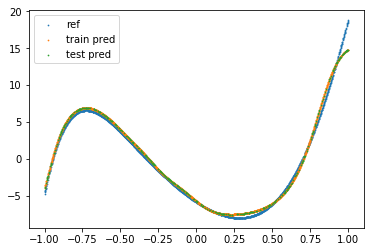

In [344]:
yh = model.predict(x_train)[:,0]
plt.scatter(x_train, y_train, label='ref', s=0.5)
plt.scatter(x_train, yh, label='train pred', s=0.5)
yh = model.predict(x_test)[:,0]
plt.scatter(x_test, yh, label='test pred', s=0.5)
plt.legend()

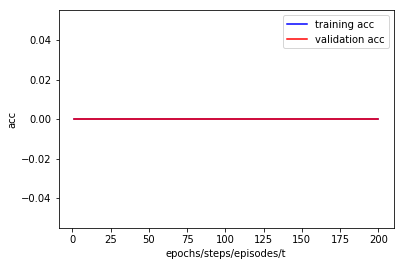

In [345]:
import sys
sys.path.append('/Users/atobe/Dropbox/ATAT/st/')
import viz
import importlib
importlib.reload(viz)
viz.Plotter().plot_perf(history)